In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

# What does our dataset look like?

In [4]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
637,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,C.A. 31921,26.2500,NaN,S
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S
291,292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,11967,91.0792,B49,C


# What is the number or Rows and Columns?

In [6]:
df.shape

(891, 12)

# What types of Columns are there?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# What does it look like Mathematically?

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Are there any Null values?

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Are there any duplicated rows?

In [14]:
df.duplicated().sum()

np.int64(0)

# Is there any correlation between our columns?

In [16]:
df.corr(numeric_only=True)["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

# Performing Explaratory Data Analysis to get to know our data on a deeper level.

## Uni-Variate Analysis

## 1. Categorical Data

<Axes: xlabel='Survived', ylabel='count'>

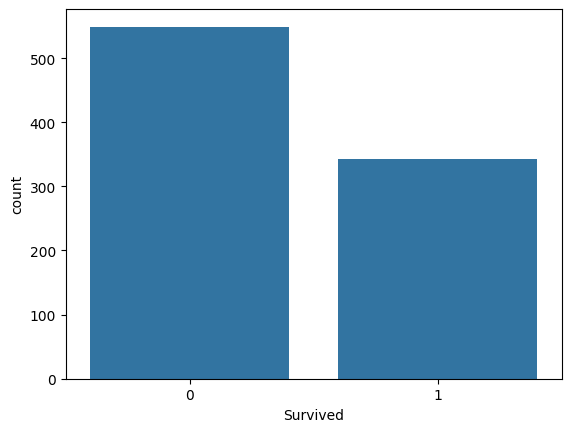

In [20]:
sns.countplot(x = df['Survived'])

In [21]:
survived_percentage = ((df['Survived']==0).sum() / len(df)) * 100
100 - survived_percentage

np.float64(38.38383838383839)

<Axes: ylabel='count'>

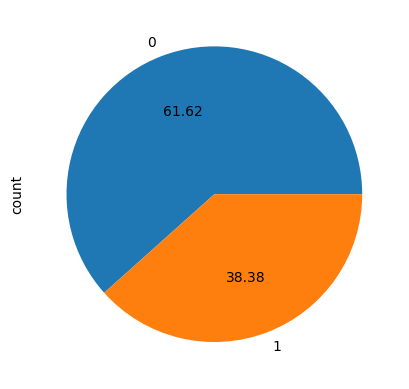

In [22]:
df['Survived'].value_counts().plot(kind='pie', autopct='%.2f')

#### This plot and the calculation show us that about 1 in every 3 people that boarded the titanic survived.

<Axes: xlabel='Pclass', ylabel='count'>

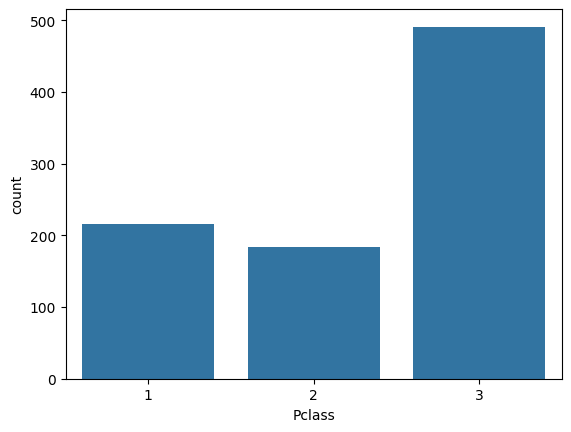

In [24]:
sns.countplot(x = df['Pclass'])

<Axes: ylabel='count'>

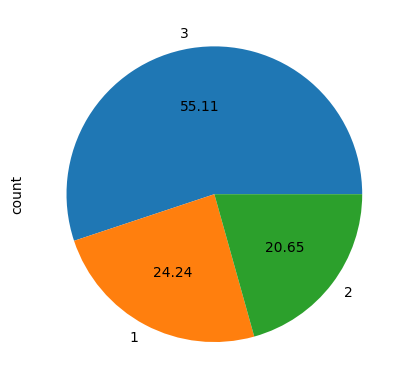

In [25]:
df['Pclass'].value_counts().plot(kind='pie', autopct='%.2f')

<Axes: xlabel='Pclass', ylabel='Fare'>

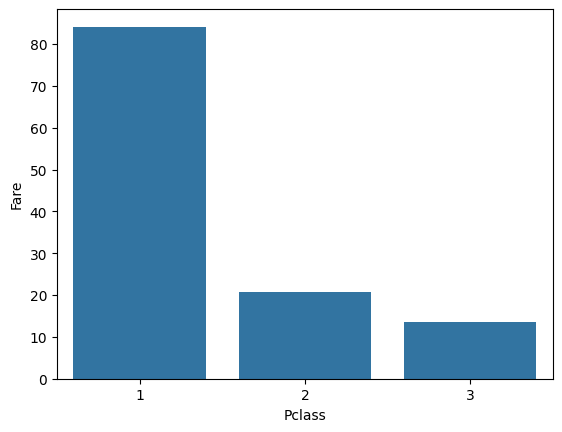

In [26]:
sns.barplot(x='Pclass', y='Fare', data=df, errorbar=None)

#### The difference in the Mean fair between Pclass 3 and 2 is not as significant as compared to the difference with Pclass 1. It's interesting that more people opted for Pclass 1 than Pclass 2 given the staggering difference in the mean fair.

<Axes: xlabel='Pclass', ylabel='Survived'>

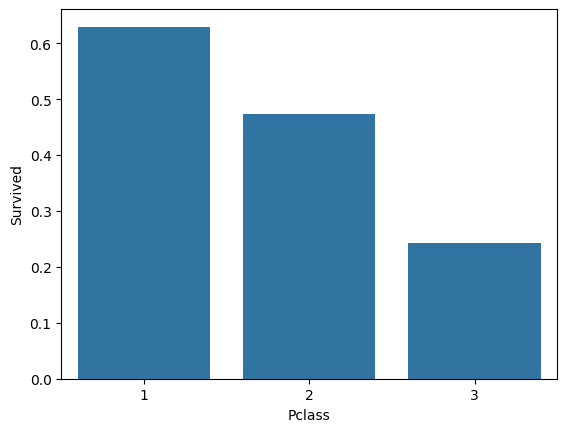

In [28]:
sns.barplot(x='Pclass', y='Survived', data=df, errorbar=None)

#### This plot shows us that the passengers of higher classes were prioritized backed by the survival rate.

<Axes: xlabel='Sex', ylabel='count'>

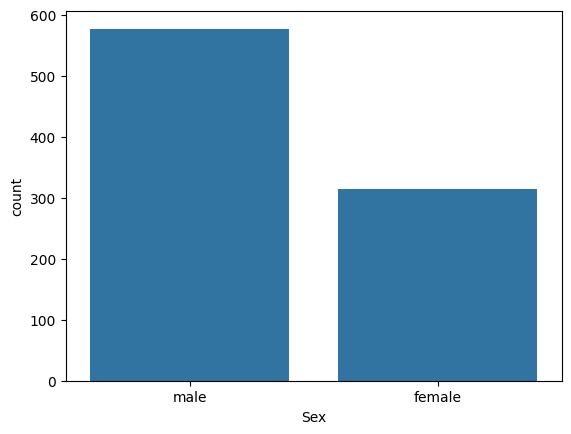

In [30]:
sns.countplot(x=df['Sex'])

In [54]:
df['Sex'].value_counts(normalize=True) * 100

Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64

<Axes: xlabel='Sex', ylabel='Survived'>

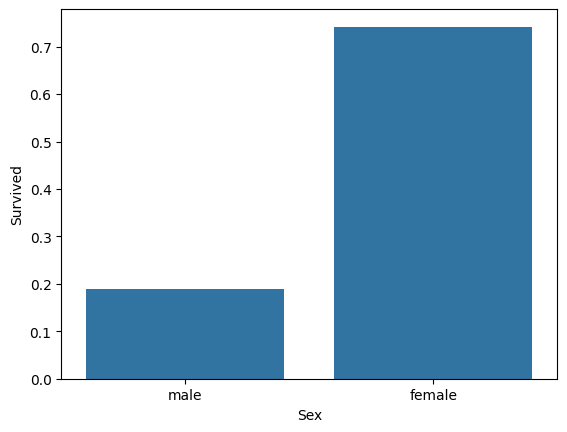

In [32]:
sns.barplot(x='Sex', y='Survived', data=df, errorbar=None)

#### Most of the people on the titanic were male with a percentage of 64.75%. However females had a better survival rate of over 70% compared to males who had less than a 20% survival rate. This shows us that females were prioritized over males.

<Axes: xlabel='Embarked', ylabel='count'>

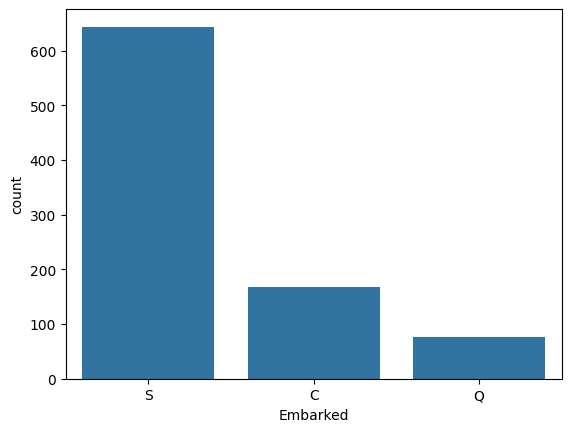

In [62]:
sns.countplot(x='Embarked' , data=df)

<Axes: xlabel='Embarked', ylabel='Survived'>

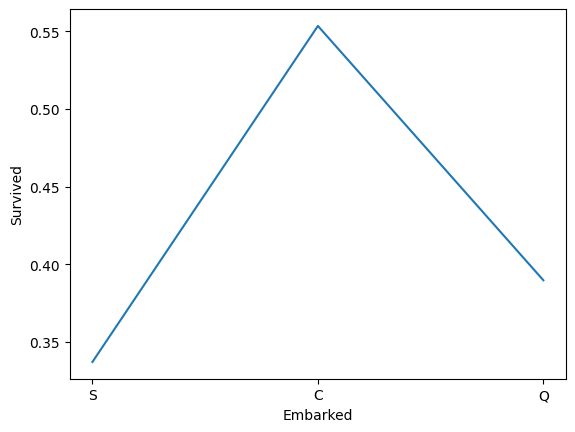

In [80]:
sns.lineplot(x='Embarked', y='Survived', data=df, errorbar=None)

<Axes: ylabel='count'>

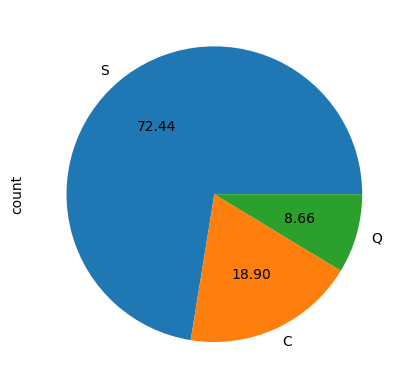

In [74]:
df['Embarked'].value_counts().plot(kind='pie', autopct='%.2f')

<Axes: xlabel='SibSp', ylabel='count'>

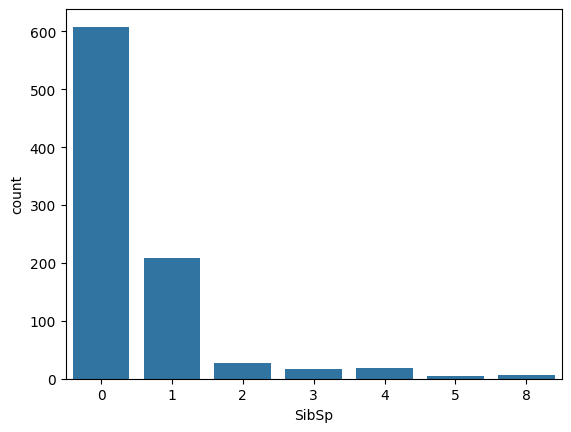

In [78]:
sns.countplot(x=df['SibSp'])

<Axes: xlabel='SibSp', ylabel='Survived'>

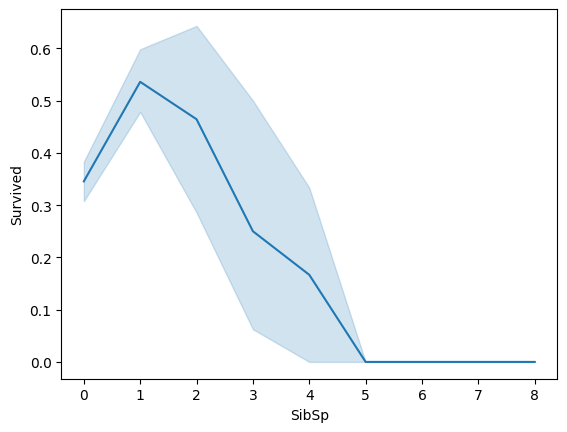

In [82]:
sns.lineplot(x='SibSp', y='Survived', data=df)

<Axes: xlabel='Parch', ylabel='count'>

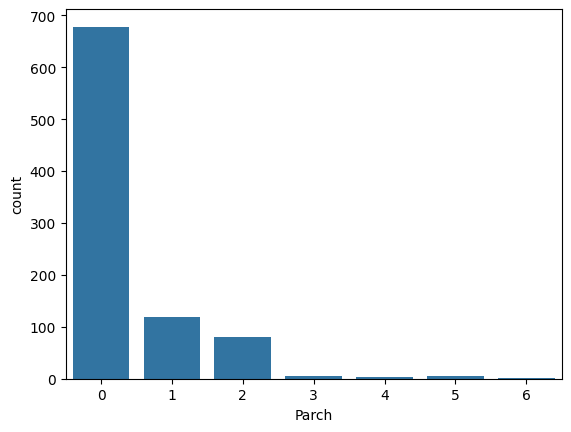

In [86]:
sns.countplot(x=df['Parch'])

<Axes: xlabel='Parch', ylabel='Survived'>

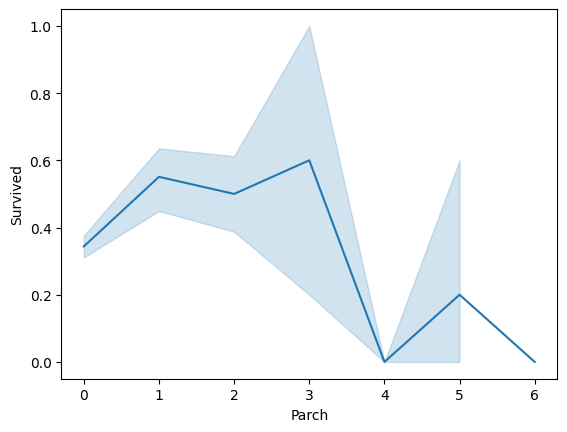

In [88]:
sns.lineplot(x='Parch', y='Survived', data=df)

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

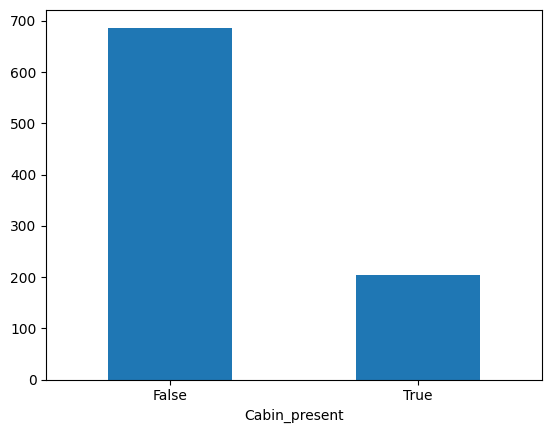

In [150]:
df['Cabin_present'] = df['Cabin'].notna()

df['Cabin_present'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

In [152]:
grouped = df.groupby(['Cabin_present', 'Survived']).size().unstack(fill_value=0)
print(grouped)

Survived         0    1
Cabin_present          
False          481  206
True            68  136


<Axes: xlabel='Cabin_present'>

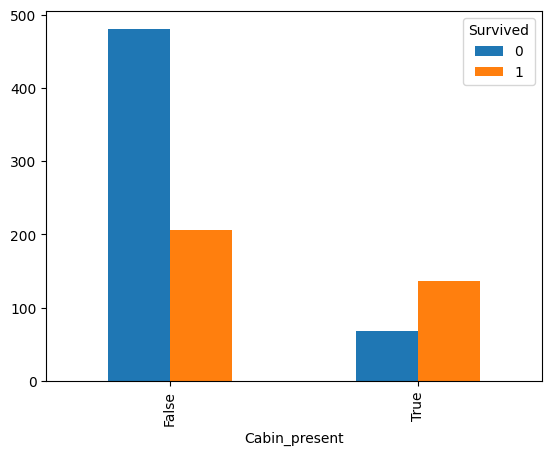

In [156]:
grouped.plot(kind='bar')

#### As it can be seen here more having a cabin also increases your survival rate

## 2. Numerical Data

(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

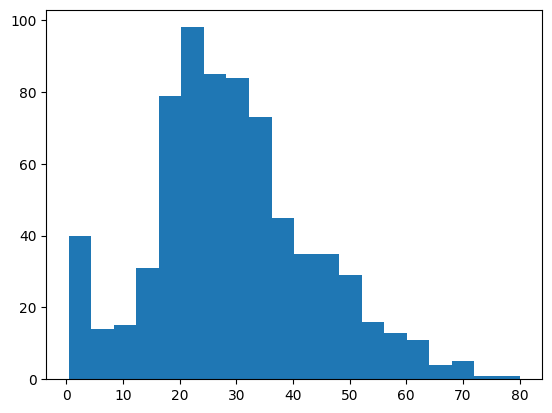

In [181]:
plt.hist(df['Age'], bins=20)

C:\Users\PC\AppData\Local\Temp\ipykernel_4928\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

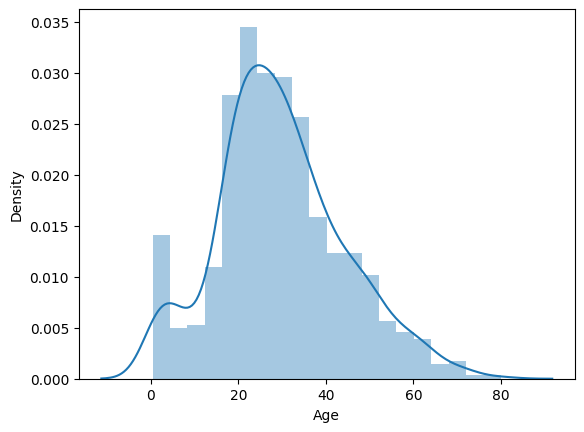

In [183]:
sns.distplot(df['Age'])

<Axes: xlabel='Fare'>

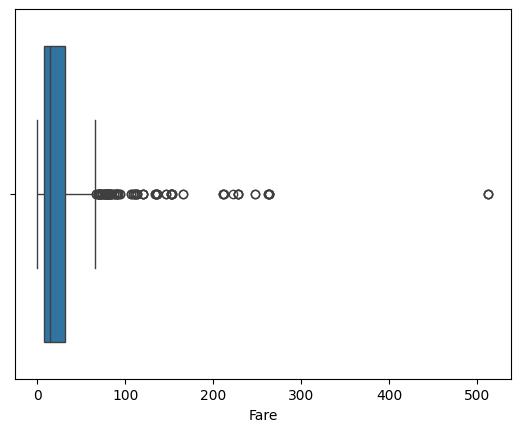

In [189]:
sns.boxplot(x=df['Fare'])